In [1]:
import pandas as pd

from sklearn.metrics.pairwise import cosine_similarity, paired_distances
import numpy as np
np.random.seed(0)

from tqdm import tqdm
import random

# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set_theme(style="white", palette="pastel")
import scipy
import json

from scipy import sparse

import time
import gc
import random

In [2]:
data_dir = '2022-06-02'

In [3]:
title_embs_df = pd.read_csv(f'scibert_encoded_papers/title_embs_df_{data_dir}.csv',index_col=0)
abstract_embs_df = pd.read_csv(f'scibert_encoded_papers/abstract_embs_df_{data_dir}.csv',index_col=0)
paper_emb = title_embs_df.join(abstract_embs_df,lsuffix='_ti',rsuffix='_ab')

In [4]:
citation_net = pd.read_csv(f'scibert_encoded_papers/citation_net_{data_dir}.tsv',sep='\t')

citing_pair = citation_net.loc[~(citation_net['citing_uid'].isna() | citation_net['cited_uid'].isna()) ][['citing_uid','cited_uid']]
len(citing_pair)

779314

In [5]:
citing_pair = citing_pair.drop_duplicates()
len(citing_pair)

777255

In [4]:
citation_net = pd.read_csv(f'scibert_encoded_papers/citation_net_{data_dir}.tsv',sep='\t')

citing_pair = citation_net.loc[~(citation_net['citing_uid'].isna() | citation_net['cited_uid'].isna()) ][['citing_uid','cited_uid']]

citing_pair = citing_pair.drop_duplicates()

citing_pair_set = list(map(lambda x:tuple(x),citing_pair.values))


In [15]:
# citing_pair.shape

In [16]:
# len(citing_pair_set)

In [17]:
# citing_pair['citing_uid'].values

In [30]:
# citing_pair

In [5]:
neg = np.random.choice(list(paper_emb.index), size=citing_pair.shape[0])

In [6]:
non_citing_pairs = [(citing_uid,neg[i]) for i, citing_uid in enumerate(citing_pair['citing_uid'])]

In [7]:
for x, y in tqdm(zip(citing_pair_set, non_citing_pairs)):
    if x[0] != y[0]: break
else:
    print('Order Correct')


777255it [00:00, 3380452.08it/s]

Order Correct


In [36]:
#  non_citing_pairs = list(filter(
# #     lambda x: x not in citing_pair_set and x[0]!=x[1],
# #     map(
# #         lambda x:tuple(x), 
# #         np.random.choice(list(paper_emb.index), size=len(citing_pair_set))
# #     )
# # ))

In [35]:
# non_citing_pairs

In [25]:

# non_citing_pairs = list(filter(
#     lambda x: x not in citing_pair_set and x[0]!=x[1],
#     map(
#         lambda x:tuple(x), 
#         np.random.choice(list(paper_emb.index), size=len(citing_pair_set))
#     )
# ))


# non_citing_pairs = []
# for i in tqdm(citing_pair_set):
#     non_citing_pairs.append((i[0],paper_emb.index[random.randint(0,267948-1)]))

In [41]:
len(non_citing_pairs)

777255

In [5]:
# paper_uids = paper_emb.index.tolist()

In [8]:
del title_embs_df
del abstract_embs_df
del paper_emb
gc.collect()

9

In [9]:
embedding_dict = dict()

In [44]:
# for method in ['tfidf', 'glove','scibert']:

#     # SCIBERT Embedding
#     if method == 'scibert':
#         print('scibert')
#         title_embs_df = pd.read_csv(f'scibert_encoded_papers/title_embs_df_{data_dir}.csv',index_col=0)
#         abstract_embs_df = pd.read_csv(f'scibert_encoded_papers/abstract_embs_df_{data_dir}.csv',index_col=0)
#         paper_emb = title_embs_df.join(abstract_embs_df,lsuffix='_ti',rsuffix='_ab')
#         uid_map = {uid:i for i,uid in enumerate(title_embs_df.index)}
#         citing_uid_embeds = paper_emb.values[list(map(lambda x:uid_map[x],citing_pair['citing_uid'].tolist()))]
#         cited_uid_embeds = paper_emb.values[list(map(lambda x:uid_map[x],citing_pair['cited_uid'].tolist()))]
#         fake_citing_uid_embeds = paper_emb.values[list(map(lambda x:uid_map[x[0]],non_citing_pairs))]
#         fake_cited_uid_embeds = paper_emb.values[list(map(lambda x:uid_map[x[1]],non_citing_pairs))]
#         embedding_dict['scibert'] = [citing_uid_embeds, cited_uid_embeds, fake_citing_uid_embeds, fake_cited_uid_embeds]

#     # Glove Embedding
#     if method == 'glove':
#         print('glove')
#         title_embs_df = pd.read_csv(f'title_embs_df_glove_{data_dir}.csv',index_col=0)
#         abstract_embs_df = pd.read_csv(f'abstract_embs_df_glove_{data_dir}.csv',index_col=0)
#         paper_emb = title_embs_df.join(abstract_embs_df,lsuffix='_ti',rsuffix='_ab')
#         uid_map = {uid:i for i,uid in enumerate(title_embs_df.index)}
#         citing_uid_embeds = paper_emb.values[list(map(lambda x:uid_map[x],citing_pair['citing_uid'].tolist()))]
#         cited_uid_embeds = paper_emb.values[list(map(lambda x:uid_map[x],citing_pair['cited_uid'].tolist()))]
#         fake_citing_uid_embeds = paper_emb.values[list(map(lambda x:uid_map[x[0]],non_citing_pairs))]
#         fake_cited_uid_embeds = paper_emb.values[list(map(lambda x:uid_map[x[1]],non_citing_pairs))]
#         embedding_dict['glove'] = [citing_uid_embeds, cited_uid_embeds, fake_citing_uid_embeds, fake_cited_uid_embeds]

#     # TF-IDF Embedding
#     if method == 'tfidf':
#         print('tfidf')
#         values = scipy.sparse.load_npz(f'tf-idf-results/values_{data_dir}_scibert_token.npz')
#         index = json.load(open(f"tf-idf-results/index_{data_dir}_scibert_token",'r',encoding='utf-8'))
#         column = json.load(open(f"tf-idf-results/column_{data_dir}_scibert_token",'r',encoding='utf-8'))
#         # paper_emb = pd.DataFrame.sparse.from_spmatrix(values,columns=column,index=index)
#         uid_map = {uid:i for i,uid in enumerate(index)}
#         citing_uid_embeds = values[list(map(lambda x:uid_map[x],citing_pair['citing_uid'].tolist()))]
#         cited_uid_embeds = values[list(map(lambda x:uid_map[x],citing_pair['cited_uid'].tolist()))]
#         fake_citing_uid_embeds = values[list(map(lambda x:uid_map[x[0]],non_citing_pairs))]
#         fake_cited_uid_embeds = values[list(map(lambda x:uid_map[x[1]],non_citing_pairs))]
        # embedding_dict['tfidf'] = [citing_uid_embeds, cited_uid_embeds, fake_citing_uid_embeds, fake_cited_uid_embeds]

In [1]:
for method in ['tfidf','glove','scibert']:

    # SCIBERT Embedding
    if method == 'scibert':
        print('scibert')
        title_embs_df = pd.read_csv(f'scibert_encoded_papers/title_embs_df_{data_dir}.csv',index_col=0)
        abstract_embs_df = pd.read_csv(f'scibert_encoded_papers/abstract_embs_df_{data_dir}.csv',index_col=0)
        paper_emb = title_embs_df.join(abstract_embs_df,lsuffix='_ti',rsuffix='_ab')
        uid_map = {uid:i for i,uid in enumerate(title_embs_df.index)}
        citing_uid_embeds = paper_emb.values[list(map(lambda x:uid_map[x],citing_pair['citing_uid'].tolist()))]
        cited_uid_embeds = paper_emb.values[list(map(lambda x:uid_map[x],citing_pair['cited_uid'].tolist()))]
        fake_citing_uid_embeds = paper_emb.values[list(map(lambda x:uid_map[x[0]],non_citing_pairs))]
        fake_cited_uid_embeds = paper_emb.values[list(map(lambda x:uid_map[x[1]],non_citing_pairs))]
        embedding_dict['scibert'] = [citing_uid_embeds, cited_uid_embeds, fake_citing_uid_embeds, fake_cited_uid_embeds]

    # Glove Embedding
    if method == 'glove':
        print('glove')
        title_embs_df = pd.read_csv(f'title_embs_df_glove_{data_dir}.csv',index_col=0)
        abstract_embs_df = pd.read_csv(f'abstract_embs_df_glove_{data_dir}.csv',index_col=0)
        paper_emb = title_embs_df.join(abstract_embs_df,lsuffix='_ti',rsuffix='_ab')
        uid_map = {uid:i for i,uid in enumerate(title_embs_df.index)}
        citing_uid_embeds = paper_emb.values[list(map(lambda x:uid_map[x],citing_pair['citing_uid'].tolist()))]
        cited_uid_embeds = paper_emb.values[list(map(lambda x:uid_map[x],citing_pair['cited_uid'].tolist()))]
        fake_citing_uid_embeds = paper_emb.values[list(map(lambda x:uid_map[x[0]],non_citing_pairs))]
        fake_cited_uid_embeds = paper_emb.values[list(map(lambda x:uid_map[x[1]],non_citing_pairs))]
        embedding_dict['glove'] = [citing_uid_embeds, cited_uid_embeds, fake_citing_uid_embeds, fake_cited_uid_embeds]

    # TF-IDF Embedding
    if method == 'tfidf':
        print('tfidf')
        values = scipy.sparse.load_npz(f'tf-idf-results/values_{data_dir}_scibert_token.npz')
        index = json.load(open(f"tf-idf-results/index_{data_dir}_scibert_token",'r',encoding='utf-8'))
        column = json.load(open(f"tf-idf-results/column_{data_dir}_scibert_token",'r',encoding='utf-8'))
        # paper_emb = pd.DataFrame.sparse.from_spmatrix(values,columns=column,index=index)
        uid_map = {uid:i for i,uid in enumerate(index)}
        citing_uid_embeds = values[list(map(lambda x:uid_map[x],citing_pair['citing_uid'].tolist()))]
        cited_uid_embeds = values[list(map(lambda x:uid_map[x],citing_pair['cited_uid'].tolist()))]
        fake_citing_uid_embeds = values[list(map(lambda x:uid_map[x[0]],non_citing_pairs))]
        fake_cited_uid_embeds = values[list(map(lambda x:uid_map[x[1]],non_citing_pairs))]
        embedding_dict['tfidf'] = [citing_uid_embeds, cited_uid_embeds, fake_citing_uid_embeds, fake_cited_uid_embeds]

In [13]:
import json

In [48]:
# type(embedding_dict['tfidf'][0])

In [ ]:
embedding_dict['tfidf']

[<779314x21642 sparse matrix of type '<class 'numpy.float64'>'
 	with 106060405 stored elements in Compressed Sparse Row format>,
 <779314x21642 sparse matrix of type '<class 'numpy.float64'>'
 	with 92259949 stored elements in Compressed Sparse Row format>,
 <147245x21642 sparse matrix of type '<class 'numpy.float64'>'
 	with 17356895 stored elements in Compressed Sparse Row format>,
 <147245x21642 sparse matrix of type '<class 'numpy.float64'>'
 	with 17359828 stored elements in Compressed Sparse Row format>]

In [11]:
citing_pair_dis_dict = dict()

In [12]:
for method, embeddings in embedding_dict.items():
    citing_uid_embeds, cited_uid_embeds, fake_citing_uid_embeds, fake_cited_uid_embeds = embeddings
    citing_pair_dis = {'l2':[],'cos':[]}
    for i in tqdm(range(citing_uid_embeds.shape[0])):
        citing_uid_emb, cited_uid_emb = citing_uid_embeds[i], cited_uid_embeds[i]
        l2_dis = np.linalg.norm((citing_uid_emb-cited_uid_emb) if isinstance(cited_uid_emb, np.ndarray) else (citing_uid_emb-cited_uid_emb).todense())
        if isinstance(cited_uid_emb, np.ndarray):
            cos_sim = (citing_uid_emb.dot(cited_uid_emb.T)) / (np.sqrt(citing_uid_emb.dot(citing_uid_emb.T)) * np.sqrt(cited_uid_emb.dot(cited_uid_emb.T)) +1e-10)
        else:
            cos_sim = np.array((citing_uid_emb.dot(cited_uid_emb.T)).todense())[0][0] / (np.array(np.sqrt(citing_uid_emb.dot(citing_uid_emb.T).todense()))[0][0] * np.array(np.sqrt(cited_uid_emb.dot(cited_uid_emb.T).todense()))[0][0] +1e-10)
        citing_pair_dis['l2'].append(l2_dis)
        citing_pair_dis['cos'].append(cos_sim)
    
    non_citing_pair_dis = {'l2':[],'cos':[]}
    for i in tqdm(range(fake_citing_uid_embeds.shape[0])):
        citing_uid_emb, cited_uid_emb = fake_citing_uid_embeds[i], fake_cited_uid_embeds[i]
        l2_dis = np.linalg.norm((citing_uid_emb-cited_uid_emb) if isinstance(cited_uid_emb, np.ndarray) else (citing_uid_emb-cited_uid_emb).todense())
        if isinstance(cited_uid_emb, np.ndarray):
            cos_sim = (citing_uid_emb.dot(cited_uid_emb.T)) / (np.sqrt(citing_uid_emb.dot(citing_uid_emb.T)) * np.sqrt(cited_uid_emb.dot(cited_uid_emb.T)) +1e-10)
        else:
            cos_sim = np.array((citing_uid_emb.dot(cited_uid_emb.T)).todense())[0][0] / (np.array(np.sqrt(citing_uid_emb.dot(citing_uid_emb.T).todense()))[0][0] * np.array(np.sqrt(cited_uid_emb.dot(cited_uid_emb.T).todense()))[0][0] +1e-10)
        non_citing_pair_dis['l2'].append(l2_dis)
        non_citing_pair_dis['cos'].append(cos_sim)
    
    citing_pair_dis_dict[method] = [citing_pair_dis, non_citing_pair_dis]

100%|██████████| 777255/777255 [00:57<00:00, 13424.88it/s]


In [55]:
len(citing_pair_dis_dict['glove'][0]['l2']),\
len(citing_pair_dis_dict['glove'][1]['l2'])

(777255, 777255)

In [ ]:
citing_pair_dis_dict['glove'][0]['cos']
citing_pair_dis_dict['glove'][1]['cos']

In [20]:
np.log(10)

2.302585092994046

$$\mathcal{L}_{bpr} = - \mathbb{E}_{i,j} \left[\log \sigma (r_i-r_j)\right]= - \frac{1}{\mathrm{N}_{\mathrm{S}}}\sum_{j=1}^{\mathrm{N}_{\mathrm{S}}}\log \sigma (r_i-r_j)$$

In [81]:
# Lbpr loss function
# L = -1/N Σ Log σ(ri-rj)
print('glove:',-np.log(
        1/(1+np.exp(
            -(
                np.array(citing_pair_dis_dict['glove'][0]['cos']) - np.array(citing_pair_dis_dict['glove'][1]['cos'])
            )
        ))
    ).mean()
)

glove: 0.6873520226624138


In [74]:
# citing_pair_dis_dict['glove'][0]['l2']

In [80]:
# Lbpr loss function
# L = -1/N Σ Log σ(ri-rj)
print('glove:',-np.log(
    1/(1+np.exp(
        -(
            np.array(citing_pair_dis_dict['glove'][0]['l2']) - np.array(citing_pair_dis_dict['glove'][1]['l2'])
        )
    )).mean()
))

glove: 1.723354124184421


In [ ]:
citing_pair_dis_dict['glove'][0]['cos']
citing_pair_dis_dict['glove'][1]['cos']


In [37]:
scipy.special.kl_div(x,y)

array([0.01594323, 0.08013384, 0.06417668, ..., 0.00210009, 0.01651586,
       0.02907469])

## KL divergence

### glove

In [45]:
# citing 的 cos 转换为在 [-1,1]的离散分布
cnts_0, bins = np.histogram(np.array(citing_pair_dis_dict['glove'][0]['cos']),bins=200,range=(-1,1))
cnts_0 = cnts_0/len(np.array(citing_pair_dis_dict['glove'][0]['cos']))

In [48]:
# non - citing 的 cos 转换为在 [-1,1]的离散分布

cnts_1, bins = np.histogram(np.array(citing_pair_dis_dict['glove'][1]['cos']),bins=200,range=(-1,1))
cnts_1 = cnts_1/len(np.array(citing_pair_dis_dict['glove'][1]['cos']))

In [53]:
# KL DIVERGENCE
print(scipy.stats.entropy(cnts_0,cnts_1))

0.22464326811986815


In [54]:
# JS 
M = (cnts_0+cnts_1)/2

print(0.5*scipy.stats.entropy(cnts_0,M)+0.5*scipy.stats.entropy(cnts_1,M))

0.042720268943301186


In [ ]:
# citing 的 cos 转换为在 [-1,1]的离散分布
cnts_0, bins = np.histogram(np.array(citing_pair_dis_dict['scibert'][0]['cos']),bins=200,range=(-1,1))
cnts_0 = cnts_0/len(np.array(citing_pair_dis_dict['scibert'][0]['cos']))
# non - citing 的 cos 转换为在 [-1,1]的离散分布

cnts_1, bins = np.histogram(np.array(citing_pair_dis_dict['scibert'][1]['cos']),bins=200,range=(-1,1))
cnts_1 = cnts_1/len(np.array(citing_pair_dis_dict['scibert'][1]['cos']))

# KL DIVERGENCE
print(scipy.stats.entropy(cnts_0,cnts_1))


# JS 
M = (cnts_0+cnts_1)/2

print(0.5*scipy.stats.entropy(cnts_0,M)+0.5*scipy.stats.entropy(cnts_1,M))

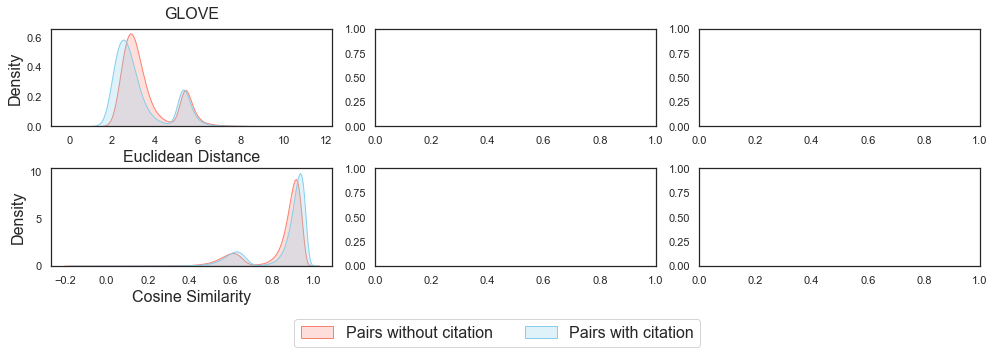

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,5))

cols = list(citing_pair_dis_dict.keys())
rows = ['Euclidean Distance', 'Cosine Similarity']
pad = 5 # in points
for ax, col in zip(axes[0], cols):
    ax.annotate(col.upper(), xy=(0.5, 1), xytext=(0, 2*pad), fontsize=16,
                xycoords='axes fraction', textcoords='offset points',
                ha='center', va='baseline')

for idx, (method, dist) in enumerate(citing_pair_dis_dict.items()):
    
    citing_pair_dis, non_citing_pair_dis = dist

    zeros_cnt_citation = (np.array(citing_pair_dis['cos'])<=0).sum()
    zeros_cnt_fake = (np.array(non_citing_pair_dis['cos'])<=0).sum()

    sns.kdeplot(non_citing_pair_dis['l2'], fill=True, color="salmon", label='Pairs without citation', ax=axes[0][idx])
    sns.kdeplot(citing_pair_dis['l2'], fill=True, color="skyblue", label='Pairs with citation', ax=axes[0][idx])
#     loc = 'upper left' if method in ['tfidf'] else 'upper right'
#     axes[0][idx].legend(fontsize=12, loc=loc)
    axes[0][idx].set_xlabel('Euclidean Distance',fontsize=16)
    axes[0][idx].set_ylabel('Density',fontsize=16)

    sns.kdeplot(non_citing_pair_dis['cos'], fill=True, color="salmon",label='Pairs without citation', ax=axes[1][idx])
    sns.kdeplot(citing_pair_dis['cos'], fill=True, color="skyblue",label='Pairs with citation', ax=axes[1][idx])
    axes[1][idx].set_xlabel('Cosine Similarity',fontsize=16)
    axes[1][idx].set_ylabel('Density',fontsize=16)
#     loc = 'upper right' if method in ['tfidf'] else 'upper left'
#     axes[1][idx].legend(fontsize=12, loc=loc)


handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, fontsize=16)
    
fig.tight_layout()
fig.subplots_adjust(bottom=0.25)
#fig.savefig('pair/citing_pair.jpg',dpi=500)

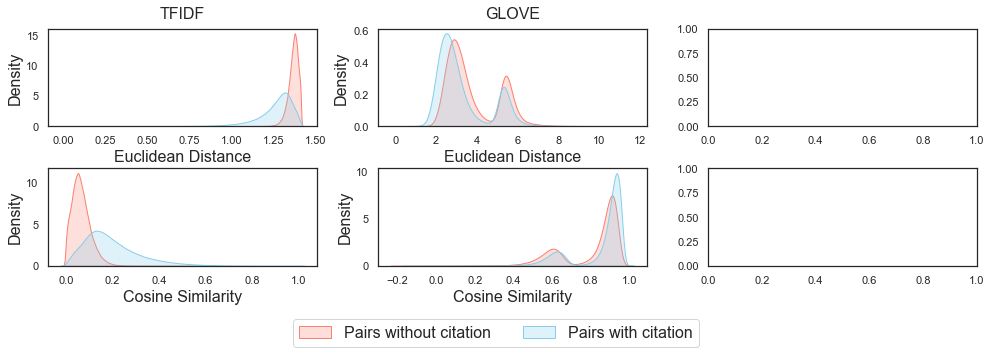

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,5))

cols = list(citing_pair_dis_dict.keys())
rows = ['Euclidean Distance', 'Cosine Similarity']
pad = 5 # in points
for ax, col in zip(axes[0], cols):
    ax.annotate(col.upper(), xy=(0.5, 1), xytext=(0, 2*pad), fontsize=16,
                xycoords='axes fraction', textcoords='offset points',
                ha='center', va='baseline')

for idx, (method, dist) in enumerate(citing_pair_dis_dict.items()):
    
    citing_pair_dis, non_citing_pair_dis = dist

    zeros_cnt_citation = (np.array(citing_pair_dis['cos'])<=0).sum()
    zeros_cnt_fake = (np.array(non_citing_pair_dis['cos'])<=0).sum()

    sns.kdeplot(non_citing_pair_dis['l2'], fill=True, color="salmon", label='Pairs without citation', ax=axes[0][idx])
    sns.kdeplot(citing_pair_dis['l2'], fill=True, color="skyblue", label='Pairs with citation', ax=axes[0][idx])
#     loc = 'upper left' if method in ['tfidf'] else 'upper right'
#     axes[0][idx].legend(fontsize=12, loc=loc)
    axes[0][idx].set_xlabel('Euclidean Distance',fontsize=16)
    axes[0][idx].set_ylabel('Density',fontsize=16)

    sns.kdeplot(non_citing_pair_dis['cos'], fill=True, color="salmon",label='Pairs without citation', ax=axes[1][idx])
    sns.kdeplot(citing_pair_dis['cos'], fill=True, color="skyblue",label='Pairs with citation', ax=axes[1][idx])
    axes[1][idx].set_xlabel('Cosine Similarity',fontsize=16)
    axes[1][idx].set_ylabel('Density',fontsize=16)
#     loc = 'upper right' if method in ['tfidf'] else 'upper left'
#     axes[1][idx].legend(fontsize=12, loc=loc)


handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, fontsize=16)
    
fig.tight_layout()
fig.subplots_adjust(bottom=0.25)
#fig.savefig('pair/citing_pair.jpg',dpi=500)

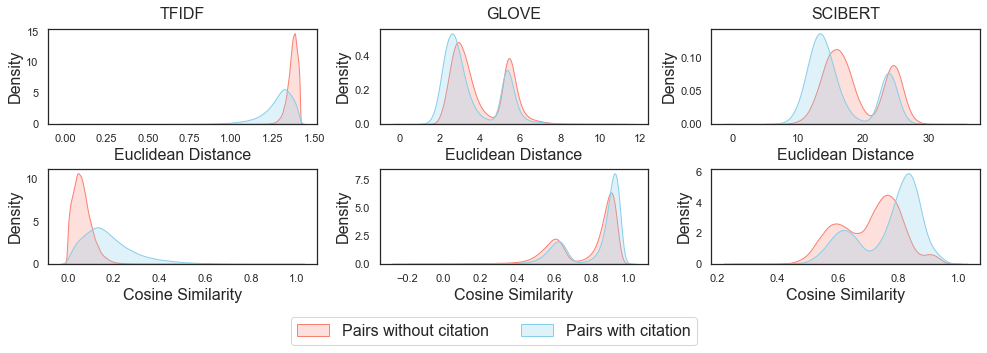

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,5))

cols = list(citing_pair_dis_dict.keys())
rows = ['Euclidean Distance', 'Cosine Similarity']
pad = 5 # in points
for ax, col in zip(axes[0], cols):
    ax.annotate(col.upper(), xy=(0.5, 1), xytext=(0, 2*pad), fontsize=16,
                xycoords='axes fraction', textcoords='offset points',
                ha='center', va='baseline')

for idx, (method, dist) in enumerate(citing_pair_dis_dict.items()):
    
    citing_pair_dis, non_citing_pair_dis = dist

    zeros_cnt_citation = (np.array(citing_pair_dis['cos'])<=0).sum()
    zeros_cnt_fake = (np.array(non_citing_pair_dis['cos'])<=0).sum()

    sns.kdeplot(non_citing_pair_dis['l2'], fill=True, color="salmon", label='Pairs without citation', ax=axes[0][idx])
    sns.kdeplot(citing_pair_dis['l2'], fill=True, color="skyblue", label='Pairs with citation', ax=axes[0][idx])
#     loc = 'upper left' if method in ['tfidf'] else 'upper right'
#     axes[0][idx].legend(fontsize=12, loc=loc)
    axes[0][idx].set_xlabel('Euclidean Distance',fontsize=16)
    axes[0][idx].set_ylabel('Density',fontsize=16)

    sns.kdeplot(non_citing_pair_dis['cos'], fill=True, color="salmon",label='Pairs without citation', ax=axes[1][idx])
    sns.kdeplot(citing_pair_dis['cos'], fill=True, color="skyblue",label='Pairs with citation', ax=axes[1][idx])
    axes[1][idx].set_xlabel('Cosine Similarity',fontsize=16)
    axes[1][idx].set_ylabel('Density',fontsize=16)
#     loc = 'upper right' if method in ['tfidf'] else 'upper left'
#     axes[1][idx].legend(fontsize=12, loc=loc)


handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, fontsize=16)
    
fig.tight_layout()
fig.subplots_adjust(bottom=0.25)
fig.savefig('pair/citing_pair.jpg',dpi=500)